#SVD - Netflix movie ratings

Adapted from: https://colab.research.google.com/github/ashishdasari148/Recommender-Systems-using-Collaborative-Filtering/blob/master/Netflix.ipynb#scrollTo=qX7Nk4tUGZND

In [ ]:
!echo '{"username":"alanlinhui","key":"317c0e7c1f9f13362ecfeee7881215b9"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d netflix-inc/netflix-prize-data

Dataset URL: https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data
License(s): other
netflix-prize-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
import zipfile
with zipfile.ZipFile('netflix-prize-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
import pandas as pd

import re
import os
import time
import matplotlib.pyplot as plt
import numpy as np
dir_name = 'data'

In [ ]:
# Converting the txt files into csv files
files = ['combined_data_1.txt','combined_data_2.txt','combined_data_3.txt','combined_data_4.txt']
for j in files:
    file1 = open(os.path.join(dir_name, j),"r+")
    print(j + " opened...")
    file2 = open(os.path.join(dir_name, j + '.csv'),"a")
    for i in file1.readlines():
        temp = re.match("(\d*)[:]", i)
        if(temp):
            movienumber = temp.group(1)
        else:
            file2.write(str(movienumber)+","+i)
    file1.close()
    file2.close()
    print(j + " closed...")

combined_data_1.txt opened...
combined_data_1.txt closed...
combined_data_2.txt opened...
combined_data_2.txt closed...
combined_data_3.txt opened...
combined_data_3.txt closed...
combined_data_4.txt opened...
combined_data_4.txt closed...


In [ ]:
movie_titles = pd.read_csv(os.path.join(dir_name, 'movie_titles.csv'), encoding = 'ISO-8859-1', header = None, names=['Movie', 'Year of Release', 'Title'], usecols=[0, 1, 2])
movie_titles

,Movie,Year of Release,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
## appending all the csv files of rating data into a single dataframe
dfs = []
for i in ['combined_data_1.txt.csv','combined_data_2.txt.csv','combined_data_3.txt.csv','combined_data_4.txt.csv']:
    df_ = pd.read_csv(os.path.join(dir_name, i), header=None, names=['Movie', 'User', 'Rating', 'Date'], usecols=[0, 1, 2, 3])
    df_ = df_[['Movie','User','Rating']]
    dfs.append(df_)
df_all = pd.concat(dfs, ignore_index=True)

In [ ]:
print("number of ratings:", len(df_all))
# what the data look? add by Hui Lin 03/17/2025
df_all.head(10)

number of ratings: 100480507


,Movie,User,Rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3
5,1,893988,3
6,1,124105,4
7,1,1248029,3
8,1,1842128,4
9,1,2238063,3


In [ ]:
# What year is the most recent movie in the rating data? Add by Hui Lin 03/17/2025
movie_titles.head(10)
max_movie = movie_titles['Year of Release'].max()
print(max_movie)

2005.0


In [ ]:
# search for your favorite movie

indices = movie_titles.Title.str.contains('Madison County', flags=re.IGNORECASE)
movie_titles[indices]
#--- updated by Hui Lin 03/17/2025
# 14550    The Shawshank Redemption
# 12293    The Godfather
# 3290     The Godfather Part II
# 5778     The Godfather Part III
# (Note: Due to limited memory, the number of self-selected movies is limited to 4)
# 9960     Die Hard
# 1799     Die Hard 2: Die Harder
# 14590    Die Hard With a Vengeance
# 8357     The Bridges of Madison County



,Movie,Year of Release,Title
8356,8357,1995.0,The Bridges of Madison County


In [ ]:
# Generate the random movie list. Modified by Hui Lin 03/23/2025

import random
# choosing random movies (fixed number as the favourite set)
#movie_ids1 = set(df_all.sample(frac=.000001).Movie.unique())
unique_movie_ids = df_all['Movie'].unique()
if len(unique_movie_ids) >= 4:
    movie_ids1 = set(random.sample(list(unique_movie_ids), 4))
else:
    movie_ids1 = set(unique_movie_ids)
movie_ids1 = {int(x) for x in movie_ids1}

# take a look
print(movie_ids1)


{17266, 203, 8886, 987}


In [ ]:
# or choosing your favorite
movie_ids2 = set({14550, 12293, 3290, 5778})

# Build the dataset by taking the union of the two sets
movie_ids = movie_ids1|movie_ids2

# take a look
print(movie_ids)


{12293, 203, 17266, 5778, 8886, 14550, 3290, 987}


In [ ]:
df_all[df_all.Movie == 14590 ]

,Movie,User,Rating
81189620,14590,185150,3
81189621,14590,2256305,5
81189622,14590,2423875,2
81189623,14590,1734805,4
81189624,14590,364518,2
...,...,...,...
81271989,14590,1955818,5
81271990,14590,2242161,4
81271991,14590,635992,4
81271992,14590,888800,3


In [ ]:
# saving the merged file to drive for further use.
#df_all.to_csv(path_or_buf=os.path.join(dir_name, 'data.txt.csv'),index=False)

In [ ]:
# loading the saved csv into dataframe
#df_all = pd.read_csv(os.path.join(dir_name, 'data.txt.csv'))

In [ ]:
print("number of ratings:", len(df_all))

number of ratings: 100480507


In [ ]:
df_movie_ids = df_all[df_all.Movie.isin(movie_ids)]
print("Unique movie ids:", (df_movie_ids.Movie.unique()))
print("Number of unique user ids:", len(df_movie_ids.User.unique()))



Unique movie ids: [  203   987  3290  5778  8886 12293 14550 17266]
Number of unique user ids: 181379


In [ ]:
#--- check the scale of the sample data
df_ = df_movie_ids.sample(frac=0.0001)
print('The number of data set:',len(df_))


The number of data set: 35


In [ ]:
# create a dataframe that only contains rating for a subset of users and
user_ids = set(df_.User.unique())
df_small = df_all[(df_all.User.isin(user_ids) & df_all.Movie.isin(movie_ids))]
print("Unique movie ids in the data set:", (df_small.Movie.unique()))
print("Number of unique user ids:", len(df_small.User.unique()))
print("Number of ratings:", len(df_small))



Unique movie ids in the data set: [ 3290  5778  8886 12293 14550]
Number of unique user ids: 35
Number of ratings: 86


In [ ]:
#--- Create an ordered list of movie IDs
itom = list(sorted(movie_ids))

#--- set up the  mapping of movie ID to its index
mtoi = {m: i for i, m in enumerate(itom)}

#--- Create an ordered list of user IDs
itou = list(sorted(user_ids))

#--- set up the  mapping of user ID to its index
utoi = {u: i for i, u in enumerate(itou)}

#--- take a look.   Add by Hui Lin 03/17/2025
print("---the info of random set:")
print("itom:",itom)
print("mtoi:",mtoi)
print("itou:",itou)
print("utoi:",utoi)



---the info of random set:
itom: [203, 987, 3290, 5778, 8886, 12293, 14550, 17266]
mtoi: {203: 0, 987: 1, 3290: 2, 5778: 3, 8886: 4, 12293: 5, 14550: 6, 17266: 7}
itou: [np.int64(138333), np.int64(198644), np.int64(278880), np.int64(308224), np.int64(347992), np.int64(513425), np.int64(691531), np.int64(820157), np.int64(840724), np.int64(908193), np.int64(996064), np.int64(1210427), np.int64(1306644), np.int64(1408379), np.int64(1437146), np.int64(1553158), np.int64(1571580), np.int64(1624471), np.int64(1640820), np.int64(1650786), np.int64(1707349), np.int64(1739970), np.int64(1786604), np.int64(1805745), np.int64(1884633), np.int64(1894134), np.int64(1900016), np.int64(1927947), np.int64(2051308), np.int64(2095586), np.int64(2286651), np.int64(2344636), np.int64(2441032), np.int64(2457749), np.int64(2461508)]
utoi: {np.int64(138333): 0, np.int64(198644): 1, np.int64(278880): 2, np.int64(308224): 3, np.int64(347992): 4, np.int64(513425): 5, np.int64(691531): 6, np.int64(820157): 7, n

In [ ]:
#--- initialize the rating matrix
user_movie_rating = np.zeros((len(itou), len(itom)))

#--- build up the matrix  (row - users; column - movies)
for index, row in df_small.iterrows():
  movie_id = row.Movie
  movie_index = mtoi[movie_id]

  user_id = row.User
  user_index = utoi[user_id]

  user_movie_rating[user_index, movie_index] = row.Rating



In [ ]:
print(user_movie_rating.shape)


(35, 8)


In [ ]:
# more efficient way of building a user-movie rating matrix
um = df_small.pivot_table(index='User', columns='Movie', values='Rating').values
print(um.shape)



(35, 5)


In [ ]:
#--- take a look
user_movie_rating[:10,]
print("the slice of data set's user_movie_rating", user_movie_rating[:10,])

#--- replace the "nan" with 0 in the um matrix.  Add by Hui Lin 03/17/2025
um = df_small.pivot_table(index='User', columns='Movie', values='Rating').fillna(0).values
print("the slice of um", um[:10,])


the slice of data set's user_movie_rating [[0.00 0.00 0.00 0.00 0.00 3.00 5.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 3.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 4.00 2.00 0.00]
 [0.00 0.00 3.00 0.00 0.00 3.00 5.00 0.00]
 [0.00 0.00 4.00 4.00 0.00 4.00 3.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 5.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 5.00 0.00 0.00]
 [0.00 0.00 4.00 0.00 0.00 4.00 4.00 0.00]
 [0.00 0.00 3.00 3.00 0.00 4.00 5.00 0.00]
 [0.00 0.00 5.00 0.00 0.00 5.00 5.00 0.00]]
the slice of um [[0.00 0.00 0.00 3.00 5.00]
 [0.00 0.00 0.00 3.00 0.00]
 [0.00 0.00 0.00 4.00 2.00]
 [3.00 0.00 0.00 3.00 5.00]
 [4.00 4.00 0.00 4.00 3.00]
 [0.00 0.00 0.00 0.00 5.00]
 [0.00 0.00 0.00 5.00 0.00]
 [4.00 0.00 0.00 4.00 4.00]
 [3.00 3.00 0.00 4.00 5.00]
 [5.00 0.00 0.00 5.00 5.00]]


In [ ]:
# compute the SVD of the matrix
A = user_movie_rating
U, S, Vt = np.linalg.svd(A, full_matrices=False)


In [ ]:
print(U.shape, S.shape, Vt.shape)
print(S)


(35, 8) (8,) (8, 8)
[36.03 13.04 10.22 7.08 3.00 0.00 0.00 0.00]


In [ ]:
#--- reconstructed  from the results of SVD
A_hat = U @ np.diag(S) @ Vt


In [ ]:
#--- print the A_hat matrix of random set
np.set_printoptions(suppress=True, formatter={'float': '{:0.2f}'.format})
print(A_hat[:10,])



[[0.00 0.00 0.00 0.00 -0.00 3.00 5.00 0.00]
 [0.00 -0.00 -0.00 -0.00 0.00 3.00 -0.00 0.00]
 [0.00 -0.00 0.00 -0.00 -0.00 4.00 2.00 0.00]
 [0.00 -0.00 3.00 -0.00 -0.00 3.00 5.00 0.00]
 [0.00 -0.00 4.00 4.00 0.00 4.00 3.00 0.00]
 [0.00 -0.00 -0.00 0.00 0.00 -0.00 5.00 0.00]
 [0.00 -0.00 0.00 -0.00 -0.00 5.00 -0.00 0.00]
 [0.00 -0.00 4.00 -0.00 -0.00 4.00 4.00 0.00]
 [0.00 -0.00 3.00 3.00 0.00 4.00 5.00 0.00]
 [0.00 -0.00 5.00 -0.00 -0.00 5.00 5.00 0.00]]


In [ ]:
#--- handle the "energy" measure of the matrix
sum([a*a for a in S[:8]])/sum([a*a for a in S])

np.float64(1.0)

### translate the code to Pyspark API

In [ ]:
from pyspark.sql import SparkSession
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix
from pyspark.mllib.linalg import Vectors, DenseMatrix

#--- Initialize SparkSession
spark = SparkSession.builder.appName("MovieRatingSVD").getOrCreate()


In [ ]:
# saving the data set to drive for further use.
df_small.to_csv(path_or_buf=os.path.join(dir_name, 'df_small.csv'),index=False)

In [ ]:
# loading the saved csv into dataframe
df_small = spark.read.csv(os.path.join(dir_name, 'df_small.csv'), header=True, inferSchema=True)

In [ ]:
#--- Extract unique movie IDs and user IDs
movie_ids = df_small.select("Movie").distinct().rdd.flatMap(lambda x: x).collect()
user_ids = df_small.select("User").distinct().rdd.flatMap(lambda x: x).collect()

#--- Sort movie IDs and user IDs
movie_ids = sorted(movie_ids)
user_ids = sorted(user_ids)

#--- Build the user-movie rating matrix
rows = df_small.rdd.map(lambda row: (
    user_ids.index(row["User"]),
    Vectors.sparse(
        len(movie_ids),
        {movie_ids.index(row["Movie"]): row["Rating"]}
)))


In [ ]:
#--- Create a RowMatrix from the sparse vectors
row_matrix = RowMatrix(rows.map(lambda x: x[1]))


In [ ]:
#--- Compute SVD with k singular values (as above: 5)
k = min(len(movie_ids), len(user_ids), 5)
svd = row_matrix.computeSVD(k, computeU=True)


In [ ]:
#--- Extract the results
U = svd.U
S = svd.s
V = svd.V
print("Singular values (S):", S)
print("Left singular vectors (U):")
U.rows.collect()  # Collect and print U (user features)
print("Right singular vectors (V):")
print(V)  # Print V (movie features)

Singular values (S): [25.25866188063018,21.817424229271428,19.4164878389476,11.489125293076057,3.0]
Left singular vectors (U):
Right singular vectors (V):
DenseMatrix([[0.00, 0.00, 1.00, 0.00, 0.00],
             [0.00, 0.00, 0.00, 1.00, 0.00],
             [0.00, 0.00, 0.00, 0.00, 1.00],
             [0.00, 1.00, 0.00, 0.00, 0.00],
             [1.00, 0.00, 0.00, 0.00, 0.00]])


In [ ]:
#--- Rebuild the rating matrix
U_local = np.array(U.rows.map(lambda v: v.toArray()).collect())
S_diag = np.diag(S)
V_local = V.toArray()

# Compute A_hat
A_hat = U_local @ S_diag @ V_local.T

# take a look
print("Rebuild matrix (A_hat):")
print(A_hat[:10])

Rebuild matrix (A_hat):
[[4.00 0.00 0.00 0.00 0.00]
 [5.00 0.00 0.00 0.00 0.00]
 [5.00 0.00 0.00 0.00 0.00]
 [5.00 0.00 0.00 0.00 0.00]
 [5.00 0.00 0.00 0.00 0.00]
 [5.00 0.00 0.00 0.00 0.00]
 [3.00 0.00 0.00 0.00 0.00]
 [5.00 0.00 0.00 0.00 0.00]
 [4.00 0.00 0.00 0.00 0.00]
 [5.00 0.00 0.00 0.00 0.00]]


In [ ]:
# Stop the SparkSession
spark.stop()

### Try to analyze the relationship between r and energy rate

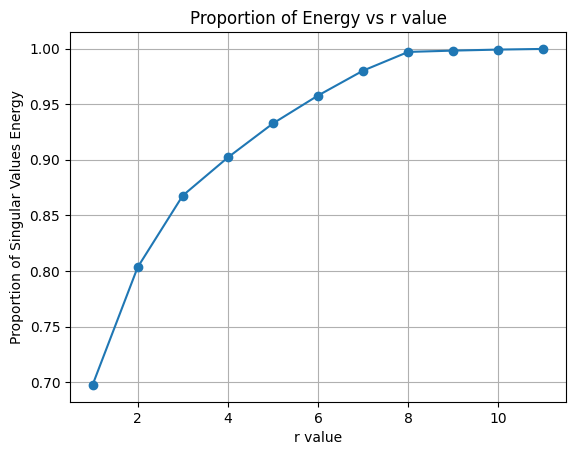

In [ ]:
#--- Analytical studies of energy value  add by Hui Lin 03/17/2025
import matplotlib.pyplot as plt

# energy list
energyRate = []
# the range of r
r = range(1, 12)

for i in r:
    numerator = sum([a * a for a in S[:i]])
    denominator = sum([a * a for a in S])
    rate = numerator / denominator
    energyRate.append(rate)

# draw the trendy
plt.plot(r, energyRate, marker='o')
plt.xlabel('r value')
plt.ylabel('Proportion of Singular Values Energy')
plt.title('Proportion of Energy vs r value')
plt.grid(True)
plt.show()

In [ ]:
r = 8
A_hat_r = U[:,:r] @ np.diag(S[:r]) @ Vt[:r,:]
np.set_printoptions(suppress=True, formatter={'float': '{:0.2f}'.format})
print(A_hat_r[:10,])

[[0.00 -0.00 -0.00 5.00 0.01 0.00 -0.03 0.00 0.00 0.00 5.00 -0.00 5.00
  -0.00 -0.00 0.01]
 [0.00 0.01 0.01 2.97 0.01 3.03 0.01 0.04 0.06 0.00 0.02 0.00 -0.01 -0.00
  0.00 0.02]
 [0.00 -0.00 -0.00 0.00 0.04 -0.00 -0.01 -0.00 -0.02 4.00 -0.00 -0.00
  4.00 3.00 -0.00 0.00]
 [0.00 -0.01 -0.01 0.00 0.04 0.00 -0.01 -0.00 -0.03 4.00 -0.00 -0.00 5.00
  -0.00 -0.00 -0.01]
 [0.00 0.00 0.00 0.00 0.06 -0.00 -0.01 -0.00 -0.02 3.00 -0.00 0.00 5.00
  5.00 0.00 0.01]
 [0.00 -0.01 -0.01 0.00 0.05 -0.00 0.01 -0.00 -0.03 4.00 3.00 -0.00 5.00
  -0.00 -0.00 -0.01]
 [-0.00 -0.01 -0.01 0.00 -0.01 0.00 0.02 0.00 -0.02 5.00 2.00 -0.00 0.00
  0.00 -0.00 -0.02]
 [4.00 0.03 0.03 4.00 0.09 4.00 0.08 4.00 0.08 4.00 5.00 0.02 5.00 4.00
  0.02 0.02]
 [4.00 0.01 0.01 -0.00 -0.04 0.00 0.01 0.00 -0.01 4.00 0.00 0.00 0.00
  4.00 0.00 -0.01]
 [0.00 -0.00 -0.00 5.00 -0.00 0.00 -0.02 0.00 -0.01 3.00 5.00 -0.00 5.00
  0.00 -0.00 0.00]]
